In [1]:
import matplotlib.pyplot as plt
import numpy as np
import astropy.io.ascii
import pylightcurve as plc
from IPython.display import display, Math
from astropy import constants as const
from astropy import units as u
%matplotlib inline

    Done!
Checking exotethys database...
Checking ephemerides database...
Checking photometry database...
Checking catalogues database...


In [2]:
tr_data = astropy.io.ascii.read("UID_0098505_PLC_025.tbl.txt", delimiter='|')   ## Extracting transit data from Winn et al. 2007

In [3]:
print(tr_data)   ## Testing to see if data is correctly extracted

     HJD      Relative_Flux Relative_Flux_Uncertainty Accepted
     days                                                     
------------- ------------- ------------------------- --------
2453988.70219        1.0034                    0.0017        1
2453988.70235        1.0055                    0.0017        1
2453988.70251         1.003                    0.0017        1
2453988.70267        0.9995                    0.0017        1
2453988.70285        0.9969                    0.0017        1
2453988.70301        0.9995                    0.0017        1
2453988.70337        1.0034                    0.0017        1
2453988.70353        1.0033                    0.0017        1
2453988.70369        0.9995                    0.0017        1
2453988.70385        0.9986                    0.0017        1
          ...           ...                       ...      ...
2453988.85926        1.0015                    0.0037        1
2453988.85944         1.004                    0.0037  

In [4]:
planet = plc.get_planet('hd189733b')     ## Changes from Dr. Wang's code. Extract all data for the planet

time_array = tr_data["HJD"].data

# Calculate Limb-darkening parameters
limb_darkening_coefficients = planet.filter('COUSINS_R').limb_darkening_coefficients   ## Also changed from Dr. Wang's code (source: https://github.com/ucl-exoplanets/pylightcurve/blob/master/README.md)

# Calculate transiting light curve
flux_array = planet.transit_integrated(time_array, time_format='BJD_TDB', exp_time=120, time_stamp = 'mid', filter_name='COUSINS_R', max_sub_exp_time=1)

PHOENIX models are only computed for solar metallicity stars. Setting stellar_metallicity = 0.
Fp/Fs estimated using A=0.15, e=1.0 for filter COUSINS_R.


In [5]:
print(limb_darkening_coefficients)   ## Checking Limb Darkening coeffs

[0.5226569509505041, -0.1711311572908598, 0.7484846982545578, -0.318073680544776]


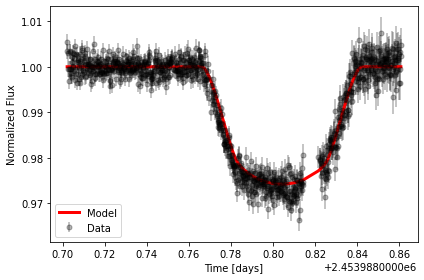

In [6]:
plt.errorbar(tr_data["HJD"], tr_data["Relative_Flux"], tr_data["Relative_Flux_Uncertainty"], ms=5, \
             marker="o", ls="none", label="Data", color="black", alpha=0.3)

# flx = 2.512**(-tr_data["col2"])
# flx = flx / np.median(flx)
# plt.plot(tr_data["col1"], flx , ms=5, \
#              marker="o", ls="none", label="Data", color="black", alpha=0.3)

plt.plot(time_array, flux_array, 'r-', lw=3, label="Model")
plt.ylim(plt.ylim()[0], plt.ylim()[1])
plt.xlabel('Time [days]')
plt.ylabel('Normalized Flux')
plt.legend()
plt.tight_layout()

In [52]:
delta = 1 - np.mean(tr_data["Relative_Flux"].data[460:720:])
print(f"$\delta$ =", delta )

$\delta$ = 0.02432038461538466


In [29]:
## Finding the rough estimates of the start and stop times of the transit depth

print(tr_data["HJD"].data[460])
print(tr_data["HJD"].data[720])
print(tr_data["Relative_Flux"].data[460])
print(tr_data["Relative_Flux"].data[720])

2453988.77937
2453988.82954
0.9821
0.9775


In [30]:
delta_d = np.std(tr_data["Relative_Flux"].data[460:720:])
print(delta_d)

0.003620700081868177


## Error propogation

$\delta = (\frac{R_{p}}{R_{*}})^{2}$

$\frac{\Delta \delta}{\delta} = 2\times \frac{\Delta R_{p}}{R_{p}} + 2\times \frac{\Delta R_{*}}{R_{*}}$

In [73]:
R_star = 0.7827 * const.R_sun           ## Radius of Star from Rosenthal et al. 2021
R_planet = (delta ** (1/2)) * R_star / const.R_jup    ## Radius of planet in terms of Jupiter Radius
delta_r_star = 0.013                     ## Uncertainty taken from Rosenthat et al. 2021


delta_r_p = R_planet * (delta_d/delta * .5 - delta_r_star/0.7827)

In [77]:
print(R_star, "m") 
print(R_planet, "R_jup")    ## Planet radius in terms of Jupiter Radius
print(delta_r_p, "R_jup")   ## Uncertainty in planet radius

544524390.0 m m
1.187804892813119 R_jup
0.06868883822855651 R_jup


Officially reported Radius and uncertainty is: 1.13 +/- 0.01 (Stassun et al. 2017)